<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/UP001_Resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#from __future__ import print_function

import pandas as pd
import numpy as np

In [37]:
reptitle = "UP20 EDA Report"

#myf = "/content/home_nvoc_(all)_BDP_0601_0608.csv" 
#myf = "/content/home_nvoc_(iptv_rt_target)_BDP_l0nml_f_nms_cc_hvo_01s_a_0601_0608.csv"
#myf = "/content/STB_QLOG_(iptv_nvoc)_BDP_L0QMT_TB_OOSIPTVSPEEDDATA_STB_LOG_0601_0608.csv"
#myf = "/content/STB_QLOG_(iptv_nvoc)_l0nml_d_qms_cc_hsd_03d_a_0601_0603.csv"
#myf = "/content/STB_QLOG_(iptv_nvoc)_l0nml_d_qms_cc_hsd_03d_a_0604_0608.csv"
#myf = "/content/QMS_NVOC_SORT.csv"
myf = "/content/4. QMS_HC_0108_all.csv"

#myo = "/content/home_nvoc_(all)_BDP_0601_0608.html" 
#myo = "/content/home_nvoc_(iptv_rt_target)_BDP_l0nml_f_nms_cc_hvo_01s_a_0601_0608.html"
#myo = "/content/STB_QLOG_(iptv_nvoc)_BDP_L0QMT_TB_OOSIPTVSPEEDDATA_STB_LOG_0601_0608.html"
#myo = "/content/STB_QLOG_(iptv_nvoc)_l0nml_d_qms_cc_hsd_03d_a_0601_0603.html"
#myo = "/content/STB_QLOG_(iptv_nvoc)_l0nml_d_qms_cc_hsd_03d_a_0604_0608.html"
#myo = "/content/QMS_NVOC_SORT.html"
#myo = "/content/QMS_HC_0108_all.html"

#df = pd.read_csv(myf, delimiter = ',', index_col = 'a2.firstlogtime', parse_dates = True)
# mday 등이 object로 남아 있어서...
df = pd.read_csv(myf, delimiter = ',', index_col = 'a2.firstlogtime', parse_dates = ['a2.firstlogtime', 'a2.lastlogtime', 'a2.mday', 'a2.bdp_load_dttm'])


# 또는 
# df['a2.firstlogtime'] = df['a2.firstlogtime'].apply(pd.to_datetime)
# df['a2.lastlogtime'] = df['a2.lastlogtime'].apply(pd.to_datetime)
# ...
# df.set_index('a2.firstlogtime', inplace = True)

# 또는 .. 가능하나 컬럼명이...
# df.a2.firstlogtime = pd.to_datetime(df.a2_firstlogtime)
 

print(df.shape)
print(df.dtypes)
print(df.info())
df


(1937728, 8)
Unnamed: 0                   int64
a1.ucube_jnr_no             object
a2.lastlogtime      datetime64[ns]
a2.mday             datetime64[ns]
a2.bdp_load_dttm    datetime64[ns]
a2.errtype                 float64
a2.errtype_nm               object
a2.model_nm                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1937728 entries, 2020-06-01 07:13:01 to 2020-06-08 07:29:00
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   a1.ucube_jnr_no   object        
 2   a2.lastlogtime    datetime64[ns]
 3   a2.mday           datetime64[ns]
 4   a2.bdp_load_dttm  datetime64[ns]
 5   a2.errtype        float64       
 6   a2.errtype_nm     object        
 7   a2.model_nm       object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 133.1+ MB
None


,Unnamed: 0,a1.ucube_jnr_no,a2.lastlogtime,a2.mday,a2.bdp_load_dttm,a2.errtype,a2.errtype_nm,a2.model_nm
a2.firstlogtime,,,,,,,,
2020-06-01 07:13:01,0,0022942045C51FD4FA0EE0388B284C252EAB81B7,2020-06-01 07:13:01,2020-06-01 07:13:01,2020-06-01 07:25:43.969420,16.0,SLEEP To Active 모드 전환,UIE4027LGU
2020-06-01 07:19:38,1,0022942045C51FD4FA0EE0388B284C252EAB81B7,2020-06-01 07:19:38,2020-06-01 07:19:38,2020-06-01 07:25:43.969420,15.0,Active To SLEEP 모드 전환,UIE4027LGU
2020-06-01 07:28:20,2,0022942045C51FD4FA0EE0388B284C252EAB81B7,2020-06-01 07:28:20,2020-06-01 07:28:20,2020-06-01 07:35:37.648574,16.0,SLEEP To Active 모드 전환,UIE4027LGU
2020-06-01 07:55:16,3,0022942045C51FD4FA0EE0388B284C252EAB81B7,2020-06-01 07:55:16,2020-06-01 07:55:16,2020-06-01 08:05:38.545022,15.0,Active To SLEEP 모드 전환,UIE4027LGU
2020-06-01 08:43:01,4,0022942045C51FD4FA0EE0388B284C252EAB81B7,2020-06-01 08:43:01,2020-06-01 08:43:01,2020-06-01 08:55:45.372397,16.0,SLEEP To Active 모드 전환,UIE4027LGU
...,...,...,...,...,...,...,...,...
2020-06-08 07:28:19,297781,FF8C9CEB090FFF1437044805C52C05BB8431EDFA,2020-06-08 07:28:19,2020-06-08 07:28:20,2020-06-08 07:35:43.930171,26.0,1일 1회 주기로 최신 업데이트된 리모컨 진단 정보 전송,TI320-DU
2020-06-08 07:28:47,297782,FF8C9CEB090FFF1437044805C52C05BB8431EDFA,2020-06-08 07:28:47,2020-06-08 07:28:47,2020-06-08 07:35:43.930171,4.0,디코더 Agent 다운 오류(avdecoder ),TI320-DU
2020-06-08 07:28:50,297783,FF8C9CEB090FFF1437044805C52C05BB8431EDFA,2020-06-08 07:28:50,2020-06-08 07:28:53,2020-06-08 07:35:43.930171,4.0,디코더 Agent 다운 오류(avdecoder ),TI320-DU


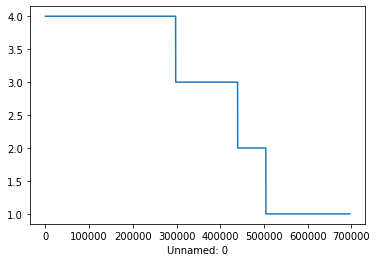

In [42]:
df.groupby('Unnamed: 0').size() #.max()
df.groupby('Unnamed: 0').size().plot()

In [46]:
df.isnull().sum()

Unnamed: 0          0
a1.ucube_jnr_no     0
a2.lastlogtime      0
a2.mday             0
a2.bdp_load_dttm    0
a2.errtype          0
a2.errtype_nm       0
a2.model_nm         0
dtype: int64

In [50]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

KeyError: ignored

In [48]:
rng = pd.date_range('2019-12-31', periods=3, freq='5S')
rng

ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3, 2), 
                  index=rng, 
                  columns=['col_1', 'col_2'])
ts

ts_upsample = ts.resample('S').mean()
ts_upsample



,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,NaN,NaN
2019-12-31 00:00:02,NaN,NaN
2019-12-31 00:00:03,NaN,NaN
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,NaN,NaN
2019-12-31 00:00:07,NaN,NaN
2019-12-31 00:00:08,NaN,NaN
2019-12-31 00:00:09,NaN,NaN


In [29]:

df_ups = df.resample(rule = 'S').mean()
df_ups

#df_sec.dtypes
#df_sec.head()

,Unnamed: 0,a2.errtype
a2.firstlogtime,,
2020-06-01 00:00:00,192926.312500,23.437500
2020-06-01 00:00:01,138016.250000,23.833333
2020-06-01 00:00:02,183091.000000,22.444444
2020-06-01 00:00:03,99522.333333,21.888889
2020-06-01 00:00:04,173119.500000,25.100000
...,...,...
2020-06-08 23:49:55,344306.000000,23.000000
2020-06-08 23:49:56,628810.000000,27.000000
2020-06-08 23:49:57,NaN,NaN


In [ ]:
date_tmp = pd.date_range(start = datetime(2020, 6, 1), 
              end = datetime(2020, 6, 8),
              freq = 'B')

df_tmp = \
pd.DataFrame({'value' : np.random.rand(len(date_tmp))},
             index = date_tmp)

In [ ]:
dfc = df
dfc['nvoc'] = dfc['nvoc'].astype('float64')
dfc['tmp'] = 'hkim'

In [ ]:
print(dfc.shape)
print(dfc.dtypes)
dfc.head()

(2603543, 10)
Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                     float64
tmp                       object
dtype: object


,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc,tmp
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,hkim
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,hkim
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,hkim
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,hkim
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,hkim


In [ ]:
#dfc.replace(r'^\s*$', np.nan, regex=True).isna().sum()

In [ ]:
#dfc = dfc.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
print ("Rows     : " ,dfc.shape[0])
print ("Columns  : " ,dfc.shape[1])
print ("\nFeatures : \n" ,dfc.columns.tolist())
print ("\nMissing values :  ", dfc.isnull().any())
print ("\nUnique values :  \n",dfc.nunique())

Rows     :  2603543
Columns  :  10

Features : 
 ['Unnamed: 0', 'a1.ucube_jnr_no', 'a2.firstlogtime', 'a2.buffer_overflow', 'a2.pts_advanced_error', 'a2.stb_rtp_errcnt', 'a2.no_stream_error', 'a2.not_decoding_error', 'nvoc', 'tmp']

Missing values :   Unnamed: 0               False
a1.ucube_jnr_no          False
a2.firstlogtime          False
a2.buffer_overflow       False
a2.pts_advanced_error    False
a2.stb_rtp_errcnt        False
a2.no_stream_error       False
a2.not_decoding_error    False
nvoc                     False
tmp                      False
dtype: bool

Unique values :  
 Unnamed: 0               2603543
a1.ucube_jnr_no             2260
a2.firstlogtime             1152
a2.buffer_overflow           735
a2.pts_advanced_error        750
a2.stb_rtp_errcnt           4020
a2.no_stream_error           428
a2.not_decoding_error         12
nvoc                           2
tmp                            1
dtype: int64


In [ ]:
!pip install -U pandas-profiling
#!pip install pandas-profiling


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [ ]:
# https://stackoverflow.com/questions/61729586/issues-with-pandas-profiling

# v2.7.1



import pandas_profiling as pp

profilehm = pp.ProfileReport(dfc, title=reptitle)
#profilehm = pp.ProfileReport(dfc)
profilehm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
profilehm.to_file(output_file = myo)

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (2603543, 9)
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
    3 variables removed since they were ID or low-information variables
    List of variables removed: ['Unnamed: 0', 'a1.ucube_jnr_no', 'a2.firstlogtime']
Since Number of Rows in data 2603543 exceeds maximum, randomly sampling 150000 rows for EDA...
Data Set Shape: 150000 rows, 6 cols

Data Set columns info:
* a2.buffer_overflow: 0 nulls, 109 unique vals, most common: {0.0: 147036, -1.0: 2720}
* 

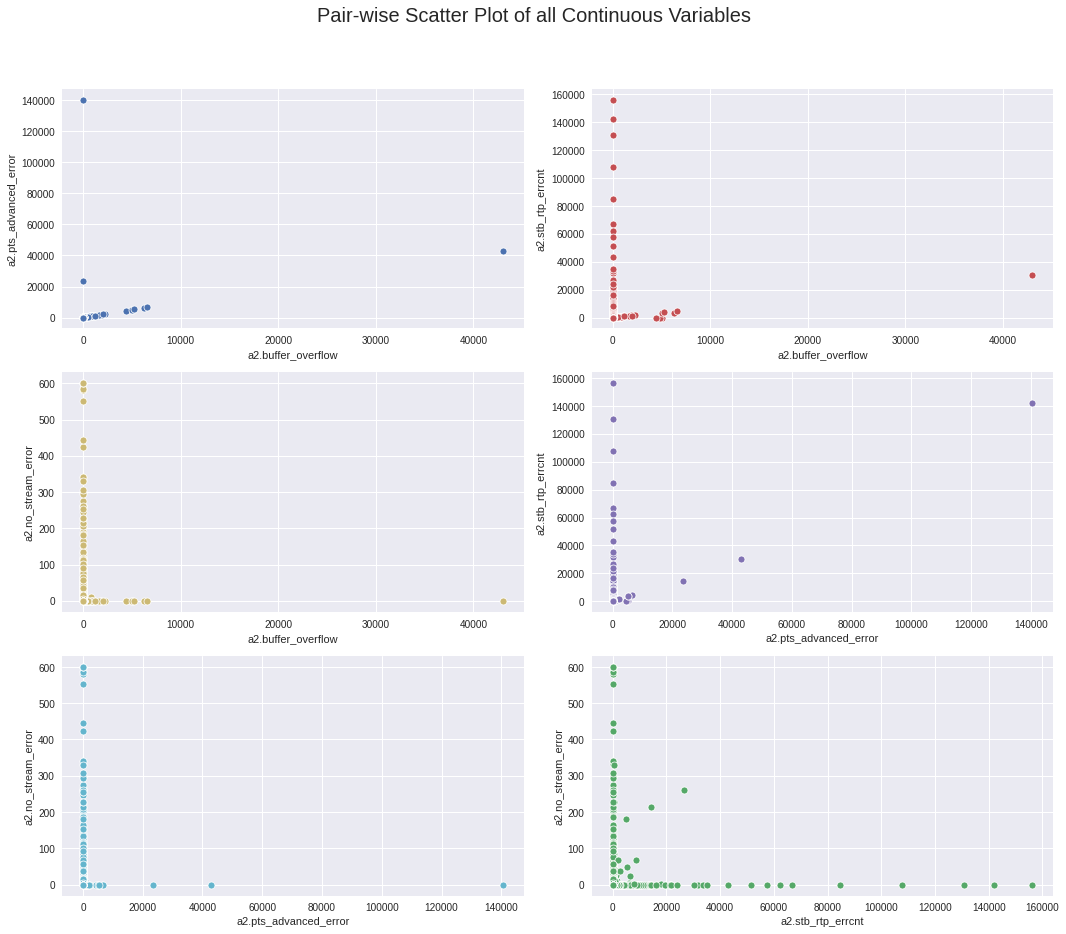

Could not draw Distribution Plot


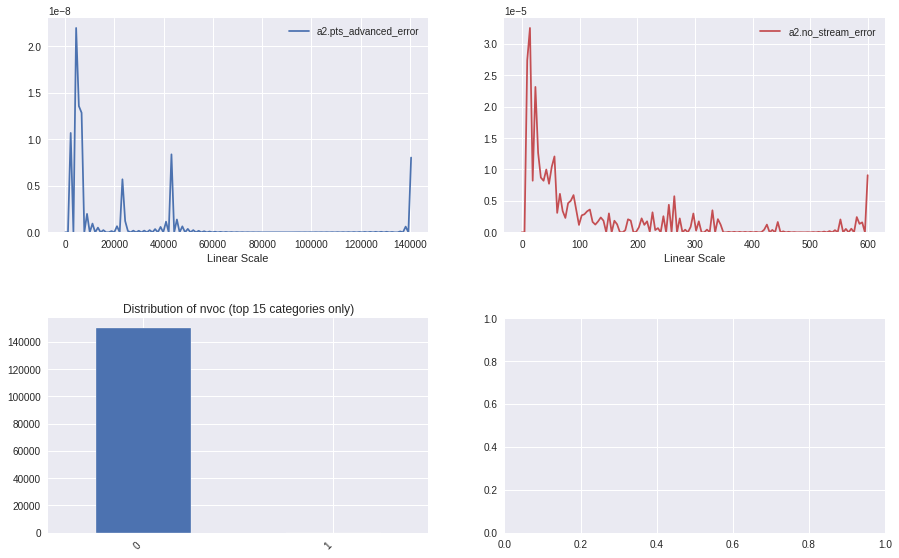

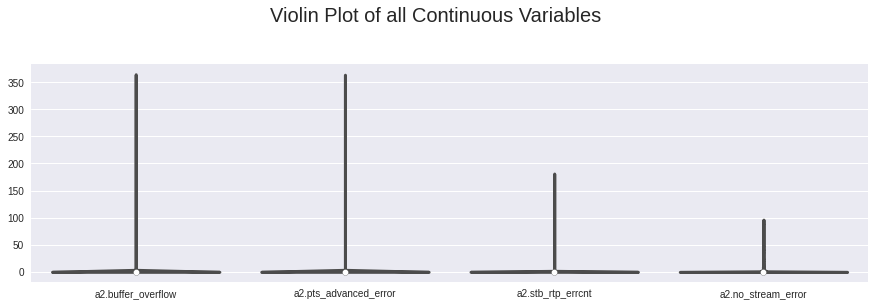

No date vars could be found in data set


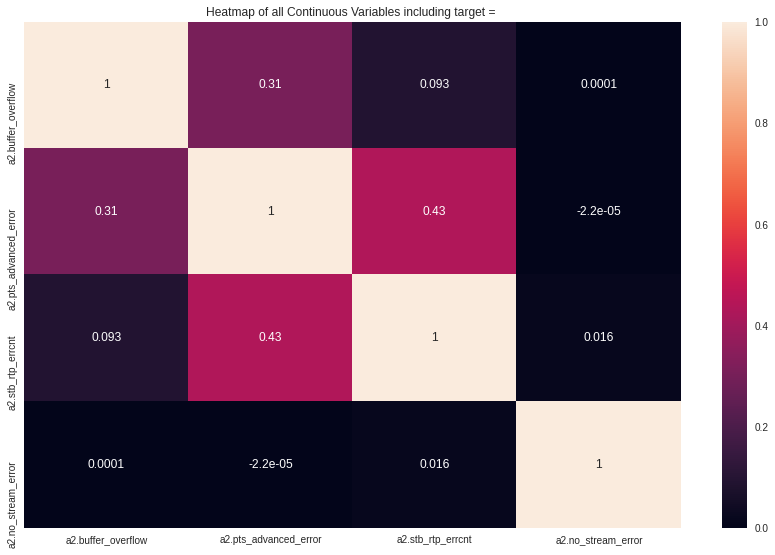

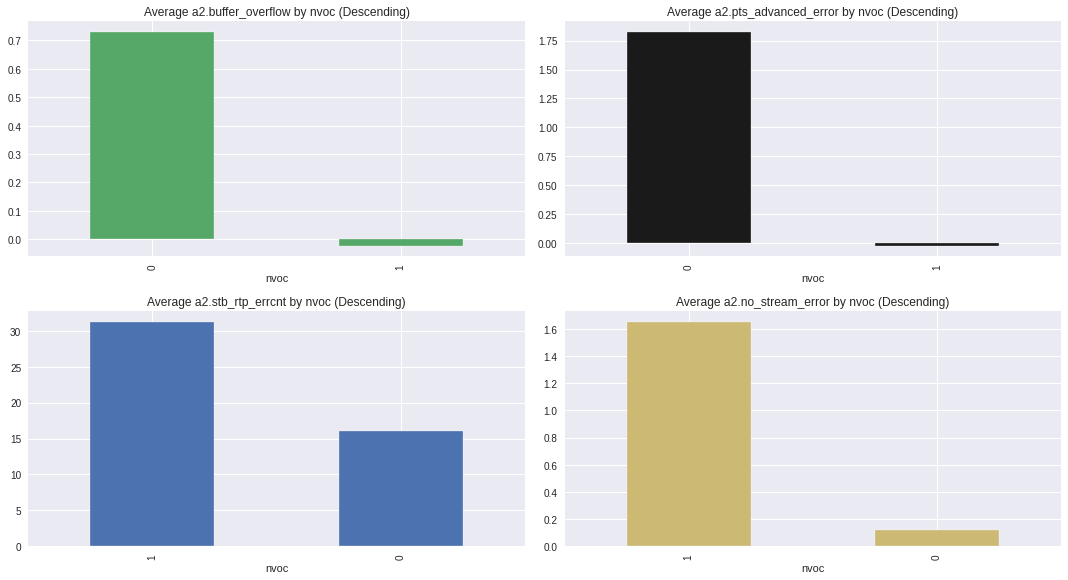

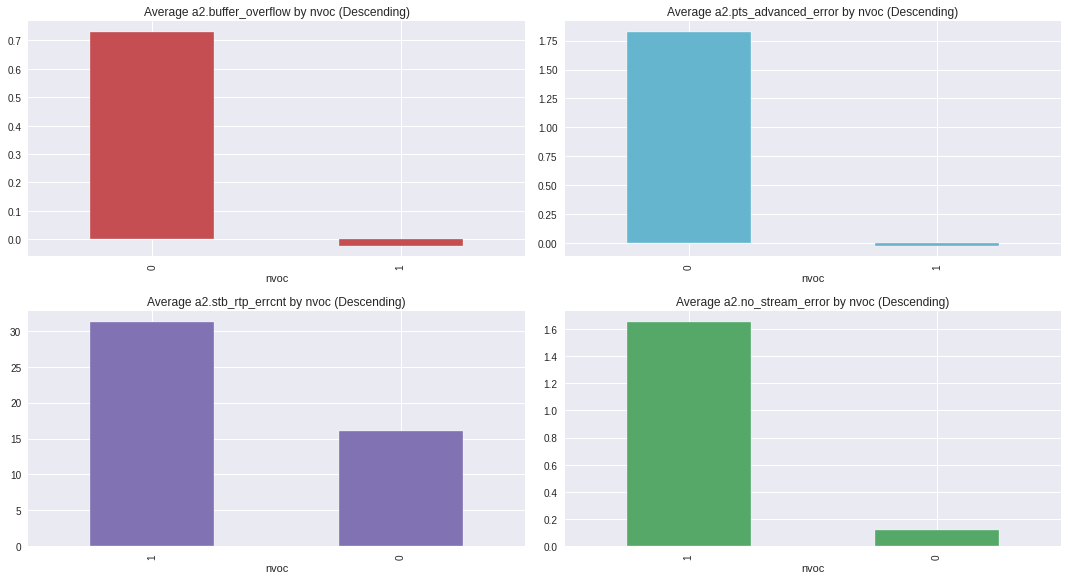

Time to run AutoViz (in seconds) = 17.825

 ###################### VISUALIZATION Completed ########################


In [ ]:
dft = AV.AutoViz(myf, sep=",", depVar="", dfte=None, header=1, verbose=1,
                 lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=50)

In [ ]:
#dft = AV.AutoViz(myf, sep=",", depVar="tb01.rprr_actn_conts", dfte=None, header=0, verbose=0,
#                 lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=50)